<center>

# ФБ-24 Шевченко Вікторія
## Лабораторна робота №4
## Структури для роботи з великими обсягами даних в Python
## Додаткове завдання

</center>

<h3> 1. За допомогою sklearn.model_selection.train_test_split() розділіть набір даних на дві рівні частини для навчання та тестування</h3>

In [2]:
import os
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:

df = pd.read_csv('result_df.csv')
display(df.head())

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,male,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,male,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,male,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,male,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,female,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42)
column_names = ['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
test_df.columns = column_names

print("Розмір навчального набору:", train_df.shape)
print("Розмір тестового набору:", test_df.shape)

Розмір навчального набору: (151, 14)
Розмір тестового набору: (152, 14)


<h3> 2. За допомогою бібліотеки scikit-learn ініціалізуйте та навчіть 3 регресійні функції за допомогою першого набору даних</h3>

In [5]:
reg = linear_model.LinearRegression()
x = train_df[['age']]
y = train_df['chol']
reg.fit(x, y)

LinearRegression()

In [6]:
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(x, y)

Lasso(alpha=0.1)

In [7]:
lassolars_reg = linear_model.LassoLars(alpha=0.1)
lassolars_reg.fit(x, y)

LassoLars(alpha=0.1)

<h3>3. Візуалізуйте вашу регресійну модель </h3>

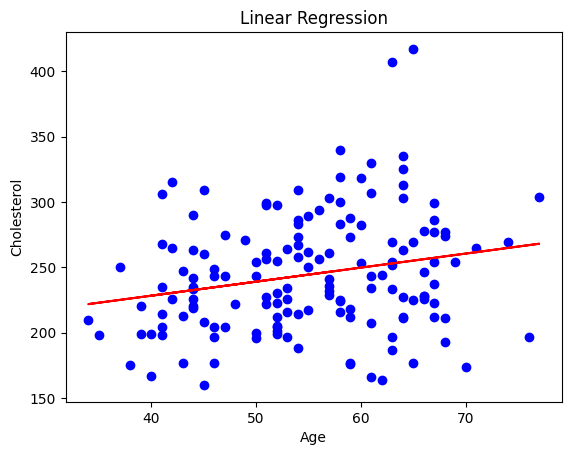

In [8]:
y_pred = reg.predict(x)

# Візуалізація результатів
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Linear Regression')
plt.show()

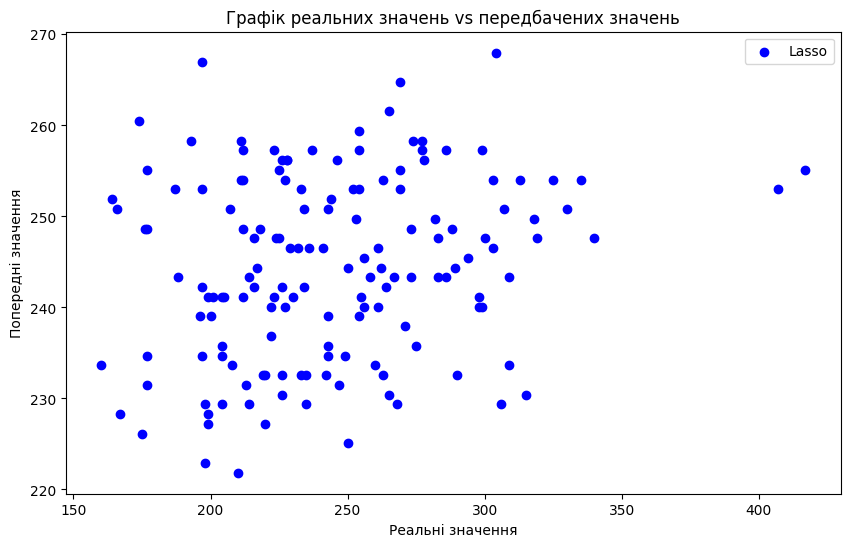

In [9]:
y_pred_lasso = lasso_reg.predict(x)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_lasso, color='blue', label='Lasso')
plt.xlabel('Реальні значення')
plt.ylabel('Попередні значення')
plt.title('Графік реальних значень vs передбачених значень')
plt.legend()
plt.show()

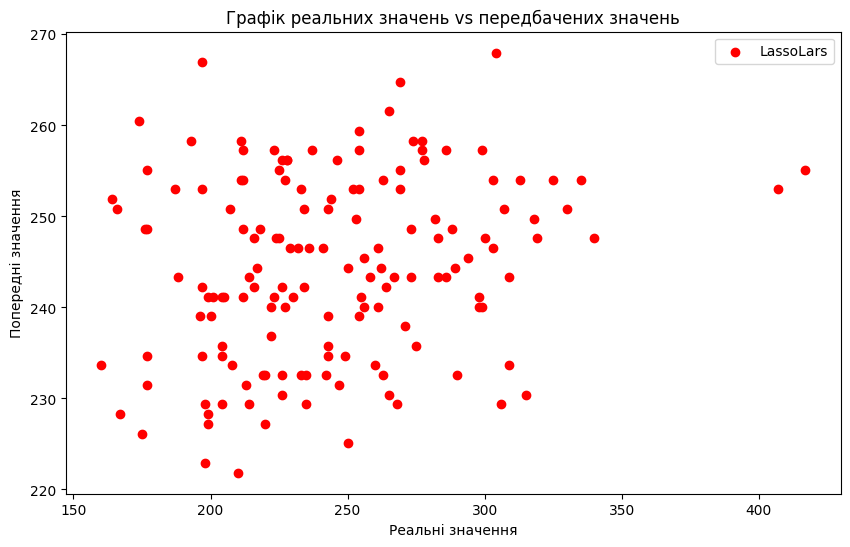

In [10]:
y_pred_lassolars = lassolars_reg.predict(x)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_lassolars, color='red', label='LassoLars')
plt.xlabel('Реальні значення')
plt.ylabel('Попередні значення')
plt.title('Графік реальних значень vs передбачених значень')
plt.legend()
plt.show()

<h3> 4. Підрахуйте Mean Squared Error за допомогою sklearn.metrics.mean_squared_error() для трьох моделей за тестовими даними</h3>

In [11]:
x_test = test_df[['age']]
y_test = test_df['chol']
y_pred_test = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 3198.072022771158


In [12]:
y_pred_lasso = lasso_reg.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso Regression):", mse_lasso)

Mean Squared Error (Lasso Regression): 3198.11071498454


In [13]:
y_pred_lars = lassolars_reg.predict(x_test)
mse_lars = mean_squared_error(y_test, y_pred_lars)
print("Mean Squared Error (LassoLars Regression):", mse_lars)

Mean Squared Error (LassoLars Regression): 3198.11071498454
